<a href="https://colab.research.google.com/github/ShamshadProttoy/Green-leaves-extraction-from-unnecessary-background-/blob/main/Green_leaves_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import skimage.exposure
import matplotlib.pyplot as plt

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }

(341, 413, 3)


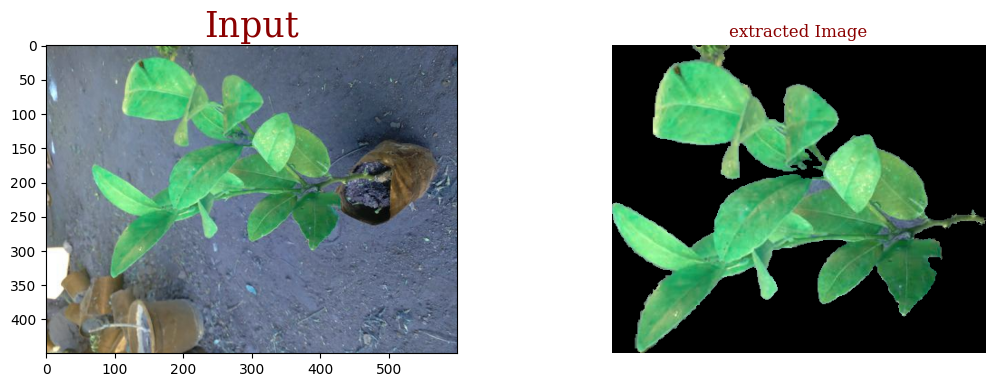

In [ ]:
import cv2
import numpy as np

def extract_green_leaves():
    # Read the image
    img = cv2.imread("434.jpg")

    # Convert the image from BGR to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define a range of green color in HSV
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])

    # Threshold the image to extract green regions
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area (assuming it corresponds to the leaves)
    max_contour = max(contours, key=cv2.contourArea)

    # Create an empty mask for the leaves
    leaves_mask = np.zeros_like(mask)

    # Draw the largest contour on the mask
    cv2.drawContours(leaves_mask, [max_contour], 0, 255, thickness=cv2.FILLED)

    # Bitwise AND the original image with the leaves mask
    result = cv2.bitwise_and(img, img, mask=leaves_mask)

    # Crop the image to the bounding box of the leaves
    x, y, w, h = cv2.boundingRect(max_contour)
    cropped_leaves = result[y:y+h, x:x+w]

    return cropped_leaves

# Replace 'your_image_path.jpg' with the path to your input image
img = cv2.imread("434.jpg")

# Perform green leaves extraction and cropping
result_image = extract_green_leaves()

# Display the original and processed images
plt.figure(figsize=(20,4))
plt.subplot(1,3,1),plt.imshow(img),plt.title("Input",fontdict=font)
#plt.subplot(1,3,2),plt.imshow(binary),plt.title("All Contours",fontdict=font)
plt.subplot(1,3,2),plt.imshow(result_image),plt.title("output",fontdict=font)
plt.imshow(result_image, cmap="gray");plt.title("extracted Image");plt.axis("off");
#cv2.imwrite("Image_bin.jpg",foreground)
print(result_image.shape)
plt.show()
